In [1]:
from DataGenerator import DataGenerator
from Models import Models
from LoadData import LoadData
from BaselineHelperFunctions import BaselineHelperFunctions
from RandomGridSearch import RandomGridSearch
import json

helper = BaselineHelperFunctions()
%load_ext tensorboard

In [2]:
csv_root = 'csv_folder_3_class'
full_data_csv, train_csv, val_csv, test_csv = LoadData(csv_root, isBalanced = True).getData()
data_gen = DataGenerator(csv_root, train_csv, val_csv, test_csv)
full_ds = data_gen.load_dataset(full_data_csv)
train_ds = data_gen.load_dataset(train_csv)
val_ds = data_gen.load_dataset(val_csv)
test_ds = data_gen.load_dataset(test_csv)
nr_earthquakes, nr_explosions, nr_noise, nr_total = helper.get_class_distribution_from_csv(full_data_csv)

print(f"Earthquakes: {nr_earthquakes}, Explosions: {nr_explosions}, Noise: {nr_noise}, Total: {nr_total}")
print(f'Train_ds: {len(train_ds)}, Val_ds: {len(val_ds)}, Test_ds: {len(test_ds)}')

Earthquakes: 6852, Explosions: 6852, Noise: 6852, Total: 20556
Train_ds: 16444, Val_ds: 2878, Test_ds: 1234


In [3]:
hyper_grid = {
        "batch_size" : [8, 16, 32, 64, 128, 256],
        "epochs" : [50, 65, 70, 75, 80],
        "learning_rate" : [0.1, 0.01, 0.001, 0.0001, 0.00001],
        "optimizer" : ["adam", "rmsprop", "sgd"]
    }
model_grid = {
    "start_neurons" : [4,8,16, 32, 64, 128, 256, 512],
    "dropout_rate" : [0.5, 0.4, 0.3, 0.2, 0.1, 0.01, 0],
    "filters" : [9, 11, 13, 15, 17],
    "kernel_size" : [3],
    "padding" : ["same", "valid"],
    "l2_r" : [0.3, 0.2, 0.1, 0.01, 0.001, 0.0001],
    "l1_r" : [0.3, 0.2, 0.1, 0.01, 0.001, 0.0001],
    "activation" : ["relu", "sigmoid", "softmax", "tanh"],
    "output_layer_activation" : ["softmax"]
}


model_nr = 3
test_mode = False
useScaler = True
detrend = False
useMinMax = False
n_picks = 40
use_tensorboard = False

randomGridSearch = RandomGridSearch(train_ds, val_ds, test_ds, model_nr, 
                                    test_mode, detrend, useScaler, useMinMax, n_picks, 
                                    hyper_grid = hyper_grid, model_grid = model_grid, 
                                    use_tensorboard = use_tensorboard)

In [4]:
def clear_tensorboard_dir():
    import os
    import shutil
    path = "tensorboard_dir/fit"
    files = os.listdir(path)
    print(files)
    for f in files:
        shutil.rmtree(os.path.join(path,f))
clear_tensorboard_dir()
%tensorboard --logdir tensorboard_dir/fit

[]


Reusing TensorBoard on port 6006 (pid 10640), started 1:05:23 ago. (Use '!kill 10640' to kill it.)

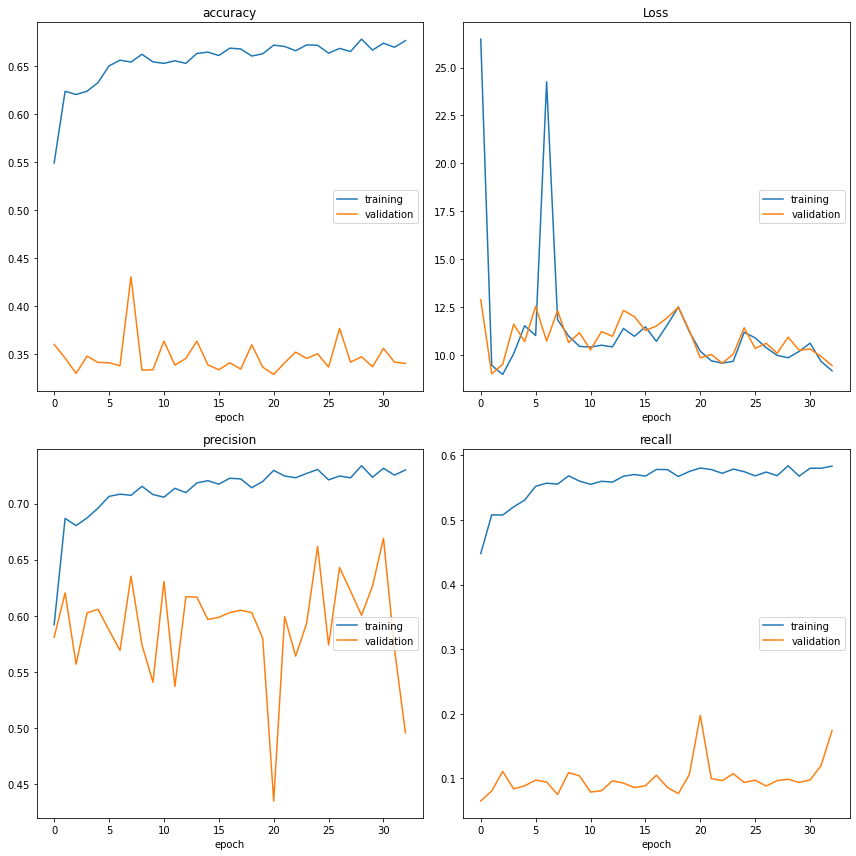

accuracy
	training         	 (min:    0.549, max:    0.678, cur:    0.677)
	validation       	 (min:    0.329, max:    0.431, cur:    0.341)
Loss
	training         	 (min:    8.994, max:   26.481, cur:    9.185)
	validation       	 (min:    9.025, max:   12.889, cur:    9.456)
precision
	training         	 (min:    0.592, max:    0.734, cur:    0.730)
	validation       	 (min:    0.435, max:    0.669, cur:    0.496)
recall
	training         	 (min:    0.448, max:    0.584, cur:    0.583)
	validation       	 (min:    0.065, max:    0.198, cur:    0.174)
2056/2055 [==============================] - 89s 43ms/step - loss: 9.1847 - accuracy: 0.6767 - precision: 0.7300 - recall: 0.5834 - val_loss: 9.4559 - val_accuracy: 0.3406 - val_precision: 0.4955 - val_recall: 0.1740
Epoch 34/80


KeyboardInterrupt: 

In [5]:
results, highest_test_accuracy_index, highest_train_accuracy_index, highest_test_precision_index, highest_test_recall_index= randomGridSearch.fit()

In [ ]:
dictionaries = randomGridSearch.read_results()
print(dictionaries)
use_tensorboard = True

**Highest test accuracy**

In [ ]:
model_test_accuracy = randomGridSearch.fit_from_result(dictionaries, highest_test_accuracy_index, use_tensorboard = use_tensorboard)

**Highest train accuracy**

In [ ]:
model_train_accuracy = randomGridSearch.fit_from_result(dictionaries, highest_train_accuracy_index, use_tensorboard = use_tensorboard)

**Highest precision**

In [ ]:
model_test_precision = randomGridSearch.fit_from_result(dictionaries, highest_test_precision_index, use_tensorboard = use_tensorboard)

**Highest recall**

In [ ]:
model_test_recall = randomGridSearch.fit_from_result(dictionaries, highest_test_recall_index, use_tensorboard = use_tensorboard)